通过前面的介绍，我们已经掌握了python语言的基本语法内容，同时也了解到如果需要构建一个复杂的功能，需要借助其他的模块或包的帮助。

所以，还记得我们一开始设定的目标么：自动化的同步阿里云盘的影视资源。

接下来，我们就以这个工作作为一个例子，看看做一个小项目到底需要经历些什么。

## 1、需求分析

现在大家对网盘都不陌生，主要拿来存我们的各种数字文件，目前用的最多的可能是百度网盘，虽然百度网盘的资源也很丰富，但下载速度不敢恭维。

去年阿里也推出了一款网盘产品——阿里云盘，主打网络不限速，光这一点已经很吸引我了，另一方面，由于很多人在上面分享最新的国内外影视资源，也就又多了一个使用的理由。

去年有好几个芒果的付费综艺我都是用阿里云盘追完的。

但使用过程中有一个问题，有些分享资源，比如电视剧或综艺，是每周都不断更新的，想要看到最新的内容，就要每天去刷新分享的文件夹，如果有最新的内容还需要手动转存到自己的网盘下，这样才能在自己的手机上观看。

虽然不是什么太复杂的操作，但程序员就是懒，能用程序解决的，绝不亲自动手操作。

从我自己的角度出发，能不能有这么一个工具，只要针对某一个分享资源设定了同步，那么这个分享下只要有新增的内容，都可以自动同步到自己的网盘下，儿不需要自己再手动操作。

同时只要有了更新就通过邮件通知自己，可以追最新的剧集了。


（如图，在浏览器上操作一遍，真的很麻烦）

<div>
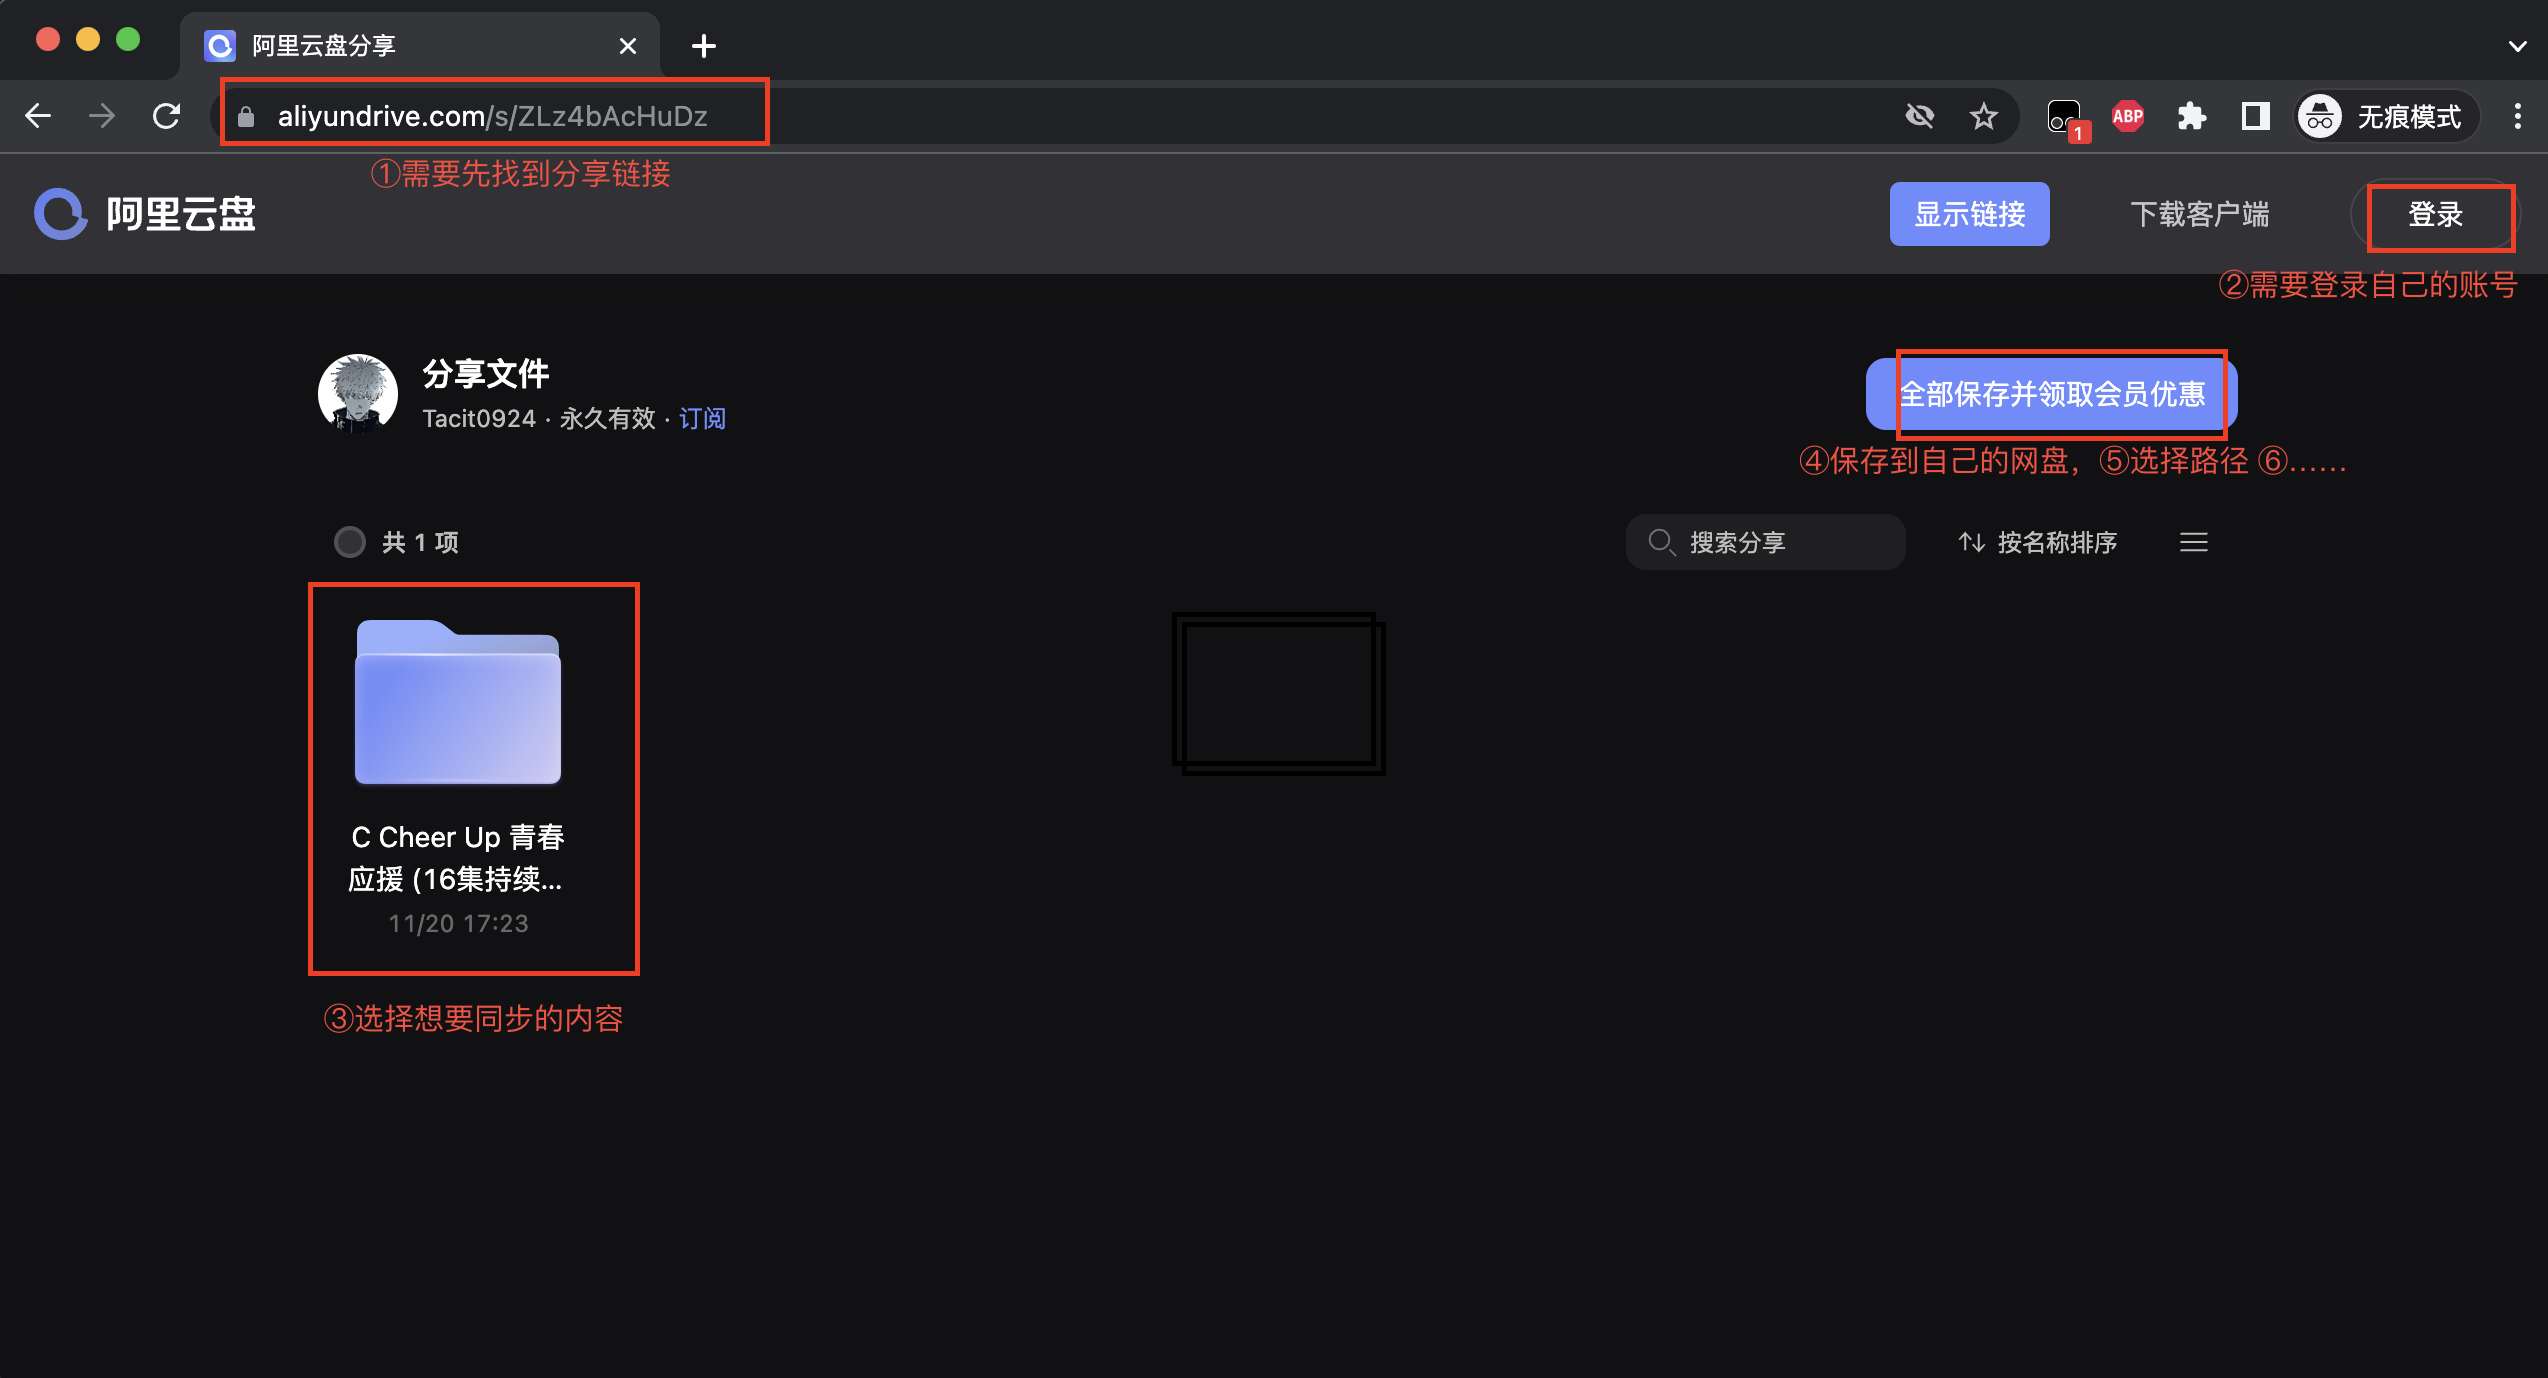
</div>

##  2、程序框架分析


就像一开始说的一样，程序无外乎两个部分，数据、逻辑

在这个项目里，数据也分为几块，先说第一部分的数据，就是输入数据，具体说就是个人想要同步的是什么资源，也就是阿里云盘的分享资源的地址，这部分必须是用户确定并输入给程序。

当然，为了用户方便，还可以做一个搜索引擎，先去网上爬取各种阿里云盘资源，并存储每个资源的分享地址，让用户根据关键字就可以快速获得相关的资源，并查找到对应的分享地址。

搜索引擎有机会以后再细说，这里假定用户已经获取到了分享资源的地址，第一部分的输入数据就已经有了。（你可以看一下微信群里的公告，那里有很多分享的资源）

有了第一部分的数据后，就需要进行逻辑处理。

其实这个逻辑用语言描述到不复杂，就是定时检查分享地址，如果有新的内容就保存下来。但程序怎么判断哪个内容是新的？那个内容是旧的？

大脑的记忆是无意识的，但机器必须要指定他记忆什么，怎么记。

所以，在程序流程中，还需要保存一部分数据，用来帮助机器执行相应的逻辑。

此外，还需要考虑如何实现逻辑，需要找找看有没有合适的第三方包能够支持我们用python对阿里网盘进行自动化操作，否则我们只能自己再去从其他机制（网络请求、app模拟器）等其他方面来实现我们的功能。

不过好在，已经有大神完成了对阿里云盘的操作封装，我们需要利用这个第三方库 [aligo](https://github.com/foyoux/aligo)  


<div>
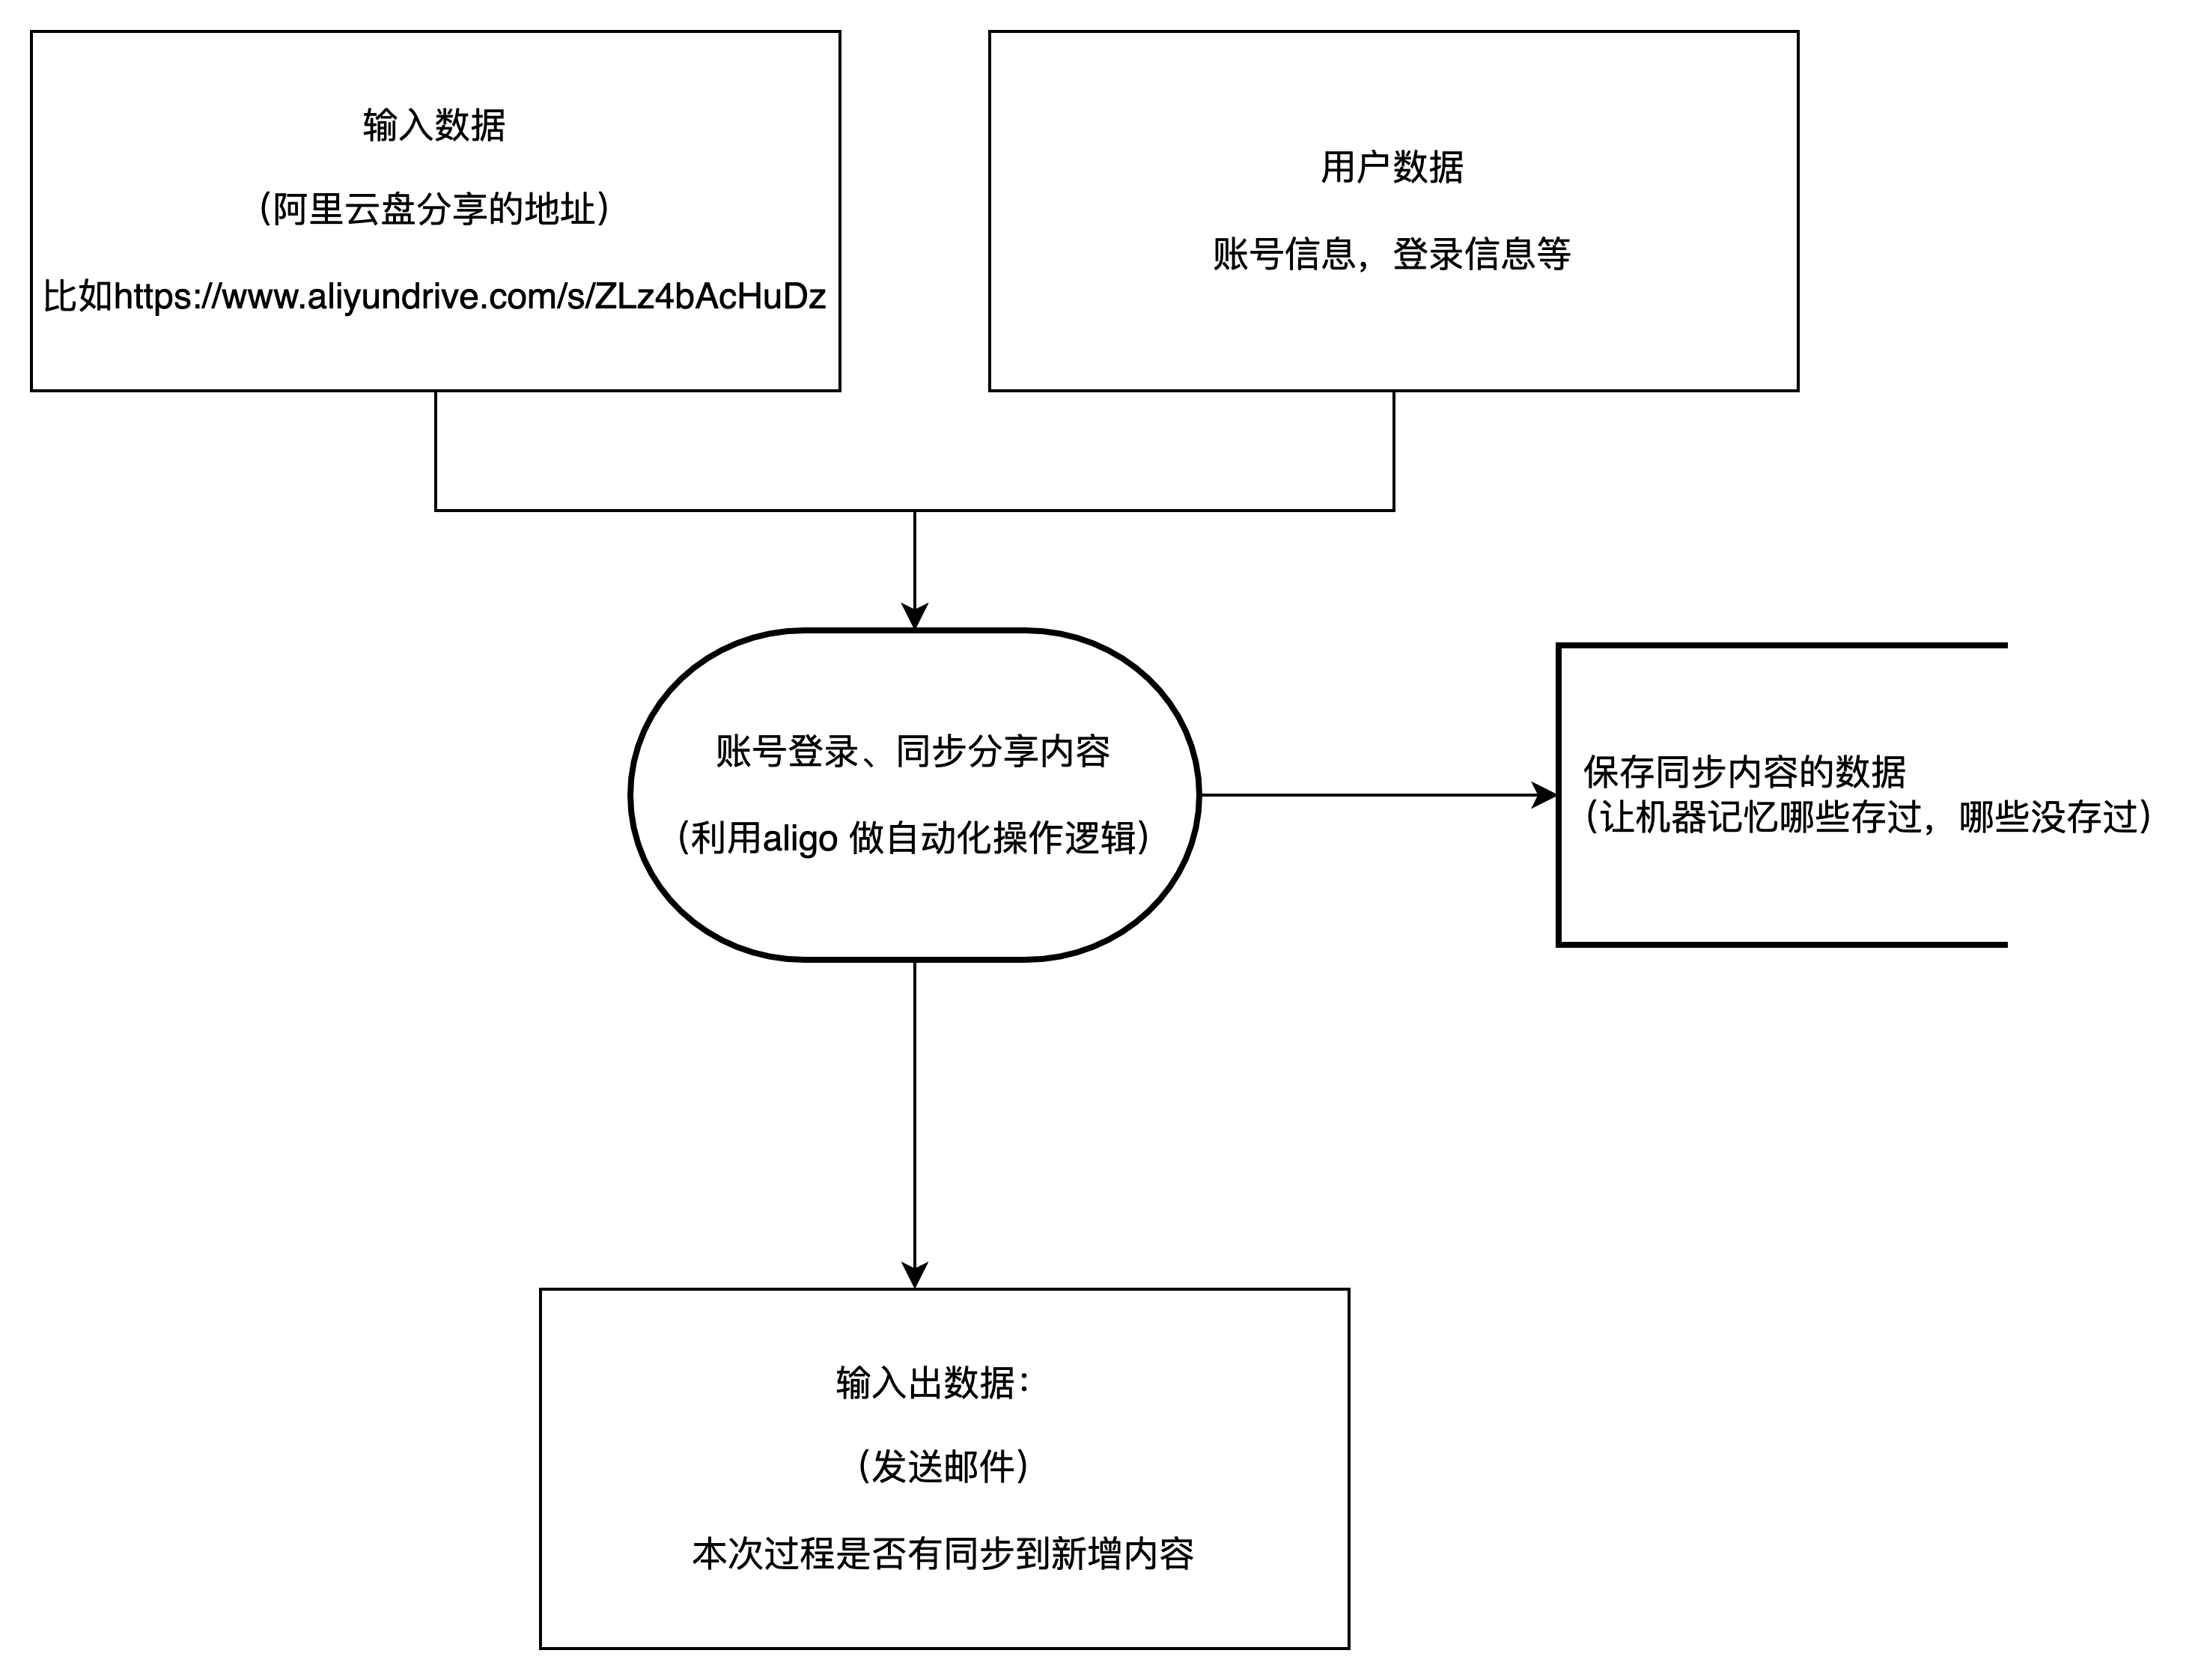
</div>

##  3、第三方库的安装

那么首先我们先来了解下aligo，看看他究竟能做些什么。

第一步就是在你的环境中安装这个第三方包。

一般的，我们都是使用这样一个命令 `pip install <package>`，其中`<package>`是你想安装的包名。

在你的环境上执行 `pip install aligo`就会看到类似如下结果
```bash
(py3.9)allanwu36$ pip install aligo
Collecting aligo
  Downloading aligo-5.5.4-py3-none-any.whl (131 kB)
     |████████████████████████████████| 131 kB 387 kB/s
Collecting qrcode[pil]
  Downloading qrcode-7.3.1.tar.gz (43 kB)
     |████████████████████████████████| 43 kB 357 kB/s
  Preparing metadata (setup.py) ... done
Collecting coloredlogs
  Downloading coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
     |████████████████████████████████| 46 kB 1.9 MB/s
Collecting qrcode-terminal
  Downloading qrcode-terminal-0.8.tar.gz (1.7 kB)
  Preparing metadata (setup.py) ... done
  
  ……………………
  ……………………
  ……………………
  
  Stored in directory: /Users/allanwu36/Library/Caches/pip/wheels/93/54/16/55cec87f8d902ed84b94ab8fdb7e89ae1158c06e130bc83b03
Successfully built qrcode-terminal qrcode
Installing collected packages: urllib3, qrcode, Pillow, humanfriendly, charset-normalizer, certifi, tqdm, requests, qrcode-terminal, coloredlogs, aligo
Successfully installed Pillow-9.3.0 aligo-5.5.4 certifi-2022.12.7 charset-normalizer-2.0.12 coloredlogs-15.0.1 humanfriendly-10.0 qrcode-7.3.1 qrcode-terminal-0.8 requests-2.27.1 tqdm-4.64.1 urllib3-1.26.13
```

这样就算安装完成了，你可以用 pip list命令查看当前安装的所有第三方包，用如下命令，可以确认是否已经安装了aligo包

```bash
(py3.9)allanwu36$ pip list |grep aligo
aligo              5.5.4
```

然后你就可以在python脚本里使用aligo了

In [ ]:
import aligo

print(aligo.__version__)

><font color = red>注意，你在浏览器的jupyter中使用的aligo包是安装在我的服务器上的，如果你想在自己的电脑上使用aligo，必须要在自己的电脑上运行pip install命令安装aligo</font>

##  一些简单的用法

接下来我们试试一些简单的操作，具体的，如果你能翻墙，你也可以查看官方的[文档](https://github.com/foyoux/aligo/wiki)

如果是第一次执行下面的代码块，会弹出一个二维码，你可以用你的阿里云盘app进行扫描登录。

如果你还没有阿里云盘，赶紧去[官网](https://www.aliyundrive.com/download?spm=aliyundrive.index.0.0.2d8310113YRx6i)下载注册一个吧

最后会打印出你的云盘下的目录列表。

In [ ]:
"""快速入门"""
from aligo import Aligo


ali = Aligo()  # 第一次使用，会弹出二维码，供扫描登录
user = ali.get_user()  # 获取用户信息
ll = ali.get_file_list()  # 获取网盘根目录文件列表
print(ll)

怎么样，通过脚本登录上了么，通过第三方的封装我们就可以简单的通过一两行代码完成很复杂的工作。

同时你可能还注意到，在运行代码时，在输出里打印了一些配置信息

```bash
00:27:28.629 aligo.INFO Config /home/jupyter-xxx/.aligo/aligo.json
00:27:28.630 aligo.INFO 日志等级 DEBUG
00:27:28.989 aligo.INFO 类 Unix 操作系统
00:27:28.994 aligo.INFO 加载配置文件 /home/jupyter-xxx/.aligo/aligo.json
```
从这里你可能大概能猜到，这个`Aligo()`函数主要工作就是去阿里云盘的接口请求了一个登录二维码，然后等你扫码登录后，把你的登录信息保存了下来，而且是保存到我的服务器的某一个文件路径下`/home/jupyter-xxx/.aligo/aligo.json`


所以请注意，当然我不会去碰你的文件，但如果你还是不放心，最好还是在你的本地电脑去进行操作和实验后面课程的内容。

这个就涉及到你如何在你的本地安装python了，你可以跟着[这里](https://www.liaoxuefeng.com/wiki/1016959663602400/1016959856222624)自己安装看看。

##  养成一个习惯

在进入接下来的学习前，我建议你最好养成一个习惯，就是查阅官方文档甚至是源码，因为课程里讲的东西很可能因为版本问题失效，或者有其他的不对应的问题。

所以查阅文档和源码是你能解决你的疑问的最直接的方法——虽然有时候比看教程效率低很多。

以下，我把`Aligo()`函数的部分[源码](https://github.com/foyoux/aligo/blob/main/aligo/apis/Aligo.py)粘贴过来，可以看到Aligo的实现就是一个类，你可以自己解读看看`__init__()`，同时也可以实验看看，在创建一个aligo对象时，不同的参数到底有什么影响。

```python

class Aligo(
    Audio,
    ......
    Video,
):
    """阿里云盘"""

    def __init__(
            self,
            name: str = 'aligo',
            refresh_token: str = None,
            show: Callable[[str], None] = None,
            level: int = logging.DEBUG,
            use_aria2: bool = False,
            proxies: Dict = None,
            port: int = None,
            email: Tuple[str, str] = None,
            request_failed_delay: float = 3,
            requests_timeout: float = None,
    ):
        """
        Aligo
        :param name: (可选, 默认: aligo) 配置文件名称, 便于使用不同配置文件进行身份验证
        :param refresh_token:
        :param show: (可选) 显示二维码的函数
        :param level: (可选) 控制控制台输出
        :param use_aria2: [bool] 是否使用 aria2 下载
        :param proxies: (可选) 自定义代理 [proxies={"https":"localhost:10809"}],支持 http 和 socks5（具体参考requests库的用法）
        :param port: (可选) 开启 http server 端口，用于网页端扫码登录. 提供此值时，将不再弹出或打印二维码
        :param email: (可选) 发送扫码登录邮件 ("接收邮件的邮箱地址", "防伪字符串"). 提供此值时，将不再弹出或打印二维码
            关于防伪字符串: 为了方便大家使用, aligo 自带公开邮箱, 省去邮箱配置的麻烦.
                        所以收到登录邮件后, 一定要对比确认防伪字符串和你设置一致才可扫码登录, 否则将导致: 包括但不限于云盘文件泄露.
            关于防伪字符串: 为了方便大家使用, aligo 自带公开邮箱, 省去邮箱配置的麻烦.
                        所以收到登录邮件后, 一定要对比确认防伪字符串和你设置一致才可扫码登录, 否则将导致: 包括但不限于云盘文件泄露.
            关于防伪字符串: 为了方便大家使用, aligo 自带公开邮箱, 省去邮箱配置的麻烦.
                        所以收到登录邮件后, 一定要对比确认防伪字符串和你设置一致才可扫码登录, 否则将导致: 包括但不限于云盘文件泄露.
        :param request_failed_delay: (可选) 由于网络异常导致的 request 异常，等待多少秒后重试
        :param requests_timeout: (可选) 应网友提议，添加 requests timeout 参数
        level, use_aria2, proxies, port, email 可以通过 配置文件 配置默认值，在 <用户家目录>/.aligo/config.json5 中
        ```json5
        {
          "level": 10,
          "use_aria2": false,
          "proxies": {
            "https": "http://localhost:10809",
            // "https": "socks5://localhost:10808", # 不支持注释，写的时候删掉
          },
          "port": 8080,
          "email": ["邮箱地址", "防伪字符串"]
        }
        ```
        """
        ......
```